## Problem Statement

A retail bank is experiencing a high customer churn rate for its retail banking business. To proactively implement preventive measures to reduce potential churn, the bank needs to know who the potential churners are, so the bank can target those customers with incentives directly to prevent them from leaving. From a business operation perspective, it is much more expensive to acquire a new customer than offering incentives to keep an existing customer.

## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [5]:
churn_data = pd.read_csv("../../../../Data/churn.csv")

In [6]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore the data

#### describe the data to view the various statistics for the features

In [10]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Detecting Outliers

In [ ]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

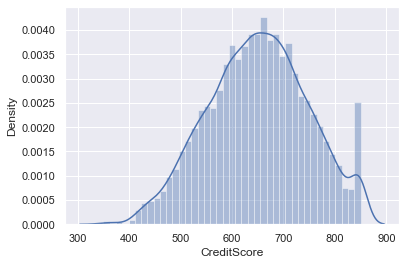

In [16]:
sns.distplot(churn_data['CreditScore']) ## This looks good and its normally distributed

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

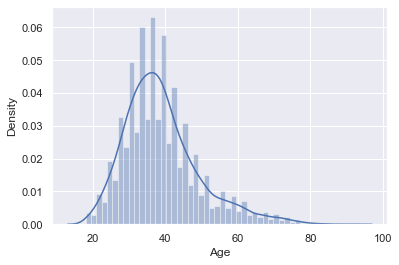

In [17]:
sns.distplot(churn_data['Age'])

In [18]:
q = churn_data['Age'].quantile(0.99) ## Lets remove the top 1% and keep all that's below it
data_1 = churn_data[churn_data['Age']<q]

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

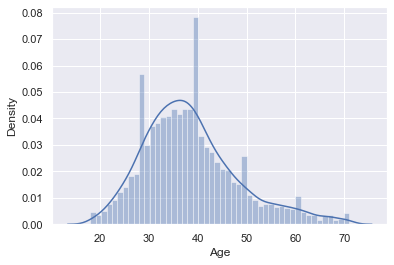

In [20]:
sns.distplot(data_1['Age'])

#### calculate correlations among features

In [21]:
data_1.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9894.000000,9.894000e+03,9894,9894.000000,9894,9894,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000
unique,NaN,NaN,2913,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,31,NaN,4959,5407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.167778,1.569089e+07,NaN,650.418941,NaN,NaN,38.526784,5.011825,76545.604574,1.530726,0.705579,0.510815,100154.402461,0.205478
std,2887.623439,7.190413e+04,NaN,96.716189,NaN,NaN,9.812208,2.892243,62408.676531,0.582275,0.455805,0.499908,57495.687050,0.404071
min,1.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2497.250000,1.562830e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51112.885000,0.000000
50%,5003.500000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97267.100000,1.000000,1.000000,1.000000,100350.530000,0.000000
75%,7501.750000,1.575315e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127671.965000,2.000000,1.000000,1.000000,149395.882500,0.000000


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

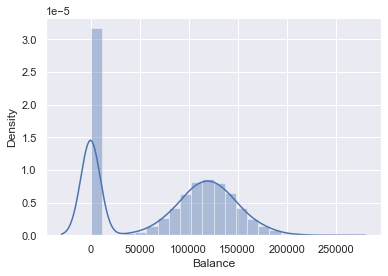

In [22]:
sns.distplot(data_1['Balance'])

In [23]:
q = churn_data['Balance'].quantile(0.25) ## Lets remove the top 25% and keep all that's above it
data_2 = churn_data[churn_data['Balance']>q]

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

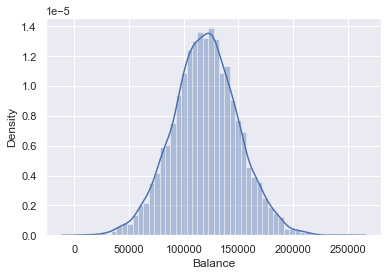

In [24]:
sns.distplot(data_2['Balance'])

In [26]:
data_2.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6383.000000,6.383000e+03,6383,6383.000000,6383,6383,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
unique,NaN,NaN,2301,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Walker,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,2596,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4982.593451,1.569037e+07,NaN,651.138493,NaN,NaN,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,2893.512280,7.192913e+04,NaN,96.934609,NaN,NaN,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,2.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2461.500000,1.562820e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,4966.000000,1.568953e+07,NaN,652.000000,NaN,NaN,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,7482.500000,1.575311e+07,NaN,718.000000,NaN,NaN,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

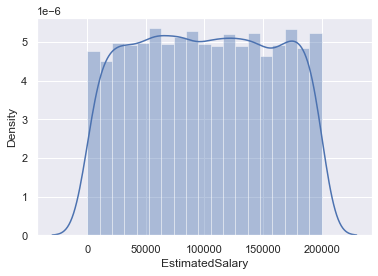

In [27]:
sns.distplot(data_2['EstimatedSalary'])

In [12]:
churn_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


## Categorical Transformatin

The dataset needs transformations in order to be used for model training. Lets transform Geography and Gender values from categorical strings to ordinal numbers so they can be taken by the ML algorithm later.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
encoder_1 = OrdinalEncoder()
encoder_2 = OrdinalEncoder()
data_2['Geo_Code'] = encoder_1.fit_transform(data_2[['Geography']]) ## encoding the Geography feature
data_2['Gender_Code'] = encoder_2.fit_transform(data_2[['Gender']]) ## encoding the Gender feature

C:\Users\m_qad\AppData\Local\Temp\ipykernel_40720\3324309736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Geo_Code'] = encoder_1.fit_transform(data_2[['Geography']])
C:\Users\m_qad\AppData\Local\Temp\ipykernel_40720\3324309736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Gender_Code'] = encoder_2.fit_transform(data_2[['Gender']])


In [29]:
data_2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Code,Gender_Code
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2.0,0.0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2.0,1.0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1.0,0.0


### Drop un-needed columns

In [30]:
data_2.drop(columns = ['Geography', 'Gender', 'RowNumber', 'Surname'], inplace=True)

C:\Users\m_qad\AppData\Local\Temp\ipykernel_40720\762436463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.drop(columns = ['Geography', 'Gender', 'RowNumber', 'Surname'], inplace=True)


In [31]:
data_2.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Code,Gender_Code
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2.0,0.0
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,2.0,1.0
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,1.0,0.0


### Rearrange the columns

In [32]:
data_2.columns.values

array(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geo_Code', 'Gender_Code'], dtype=object)

In [33]:
cols = ['Exited', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
       , 'Geo_Code', 'Gender_Code']

In [34]:
data_preprocessed = data_2[cols]
data_preprocessed ## note we placed the target column "Exited" first in the dataset. All features are numeric now. Next, let's split the data for training and validation

,Exited,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_Code,Gender_Code
1,0,15647311,608,41,1,83807.86,1,0,1,112542.58,2.0,0.0
2,1,15619304,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0
4,0,15737888,850,43,2,125510.82,1,1,1,79084.10,2.0,0.0
5,1,15574012,645,44,8,113755.78,2,1,0,149756.71,2.0,1.0
7,1,15656148,376,29,4,115046.74,4,1,0,119346.88,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,1,15769959,597,53,4,88381.21,1,1,0,69384.71,0.0,0.0
9993,0,15569266,644,28,7,155060.41,1,1,0,29179.52,0.0,1.0
9996,0,15569892,516,35,10,57369.61,1,1,1,101699.77,0.0,1.0
9998,1,15682355,772,42,3,75075.31,2,1,0,92888.52,1.0,1.0


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
## Split the dataset into training 80% and testing 20%
churn_train, churn_test = train_test_split(data_preprocessed, test_size = 0.2)

In [38]:
## split the features from the target variable "Exited" as it is required for model training and validation later
churn_train_x = churn_train.loc[:, churn_train.columns != 'Exited']
churn_train_y = churn_train['Exited']

In [39]:
churn_test_x = churn_test.loc[: , churn_test.columns != 'Exited']
churn_test_y = churn_test['Exited']

## Train the model

In [41]:
## Here will will use the Random Forest Algorithm to train the model, and the fit() function kicks off the model training

In [42]:
from sklearn.ensemble import RandomForestClassifier
bank_churn_clf = RandomForestClassifier(max_depth = 2, random_state=0)
bank_churn_clf.fit(churn_train_x, churn_train_y)

RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
## Finally, we will test the accuracy of the model using the test dataset. Here, we get the predictions returned by the model using the predict() function, and then
## use the accuracy_score function to calculate the model accuracy using the predicted values "churn_prediction_y" and the true values "churn_test_y" for the test dataset

In [44]:
from sklearn.metrics import accuracy_score
##  use the trained model to generate predictions using the test dataset
churn_prediction_y = bank_churn_clf.predict(churn_test_x)
## measure the accuracy using the accuracy_score class

accuracy_score(churn_test_y, churn_prediction_y)

0.7799530148786218